In [ ]:
# flat vs hierarchical clustering

'''
flat -> you tell machine how many clusters to find (k-means is one)
hierarchical -> machine figures out how to find and label clusters
'''

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import cross_validate, train_test_split
import pandas as pd
style.use('ggplot')

# K-Means Clusters

In [2]:
# Process

'''
1. Choose randomly centroids
-> shuffle, then take first k features from featureset for ex.
2. Calculate distance of each featureset to the centroids, and classify each featureset as the centroid class closest to it
-> can use norm/euclidean distance
3. Once you have classified all data, now you take the "mean" of the groups,
    and set the new centroids as the mean of their associated groups
4. Repeat #2,3 until optimized
-> optimized if centroid does not move much (% change), or within maximum iterations

Since k-means use euclidean distance (despite changing kernal):
- wants to equally proportion cluster groups
- scalability for larger sets

=> can start with semi-supervised clustering such as K-means to identify/label groups, then use supervised for efficiency
'''

'\n1. Choose randomly centroids\n-> shuffle, then take first k features from featureset for ex.\n2. Calculate distance of each featureset to the centroids, and classify each featureset as the centroid class closest to it\n-> can use norm/euclidean distance\n3. Once you have classified all data, now you take the "mean" of the groups,\n    and set the new centroids as the mean of their associated groups\n4. Repeat #2,3 until optimized\n-> optimized if centroid does not move much (% change), or within maximum iterations\n\nSince k-means use euclidean distance (despite changing kernal):\n- wants to equally proportion cluster groups\n- scalability for larger sets\n\n=> can start with semi-supervised clustering such as K-means to identify/label groups, then use supervised for efficiency\n'

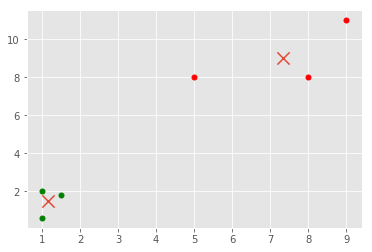

In [3]:
# EX. sample data

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])

# applying K-Means algorithm

clf = KMeans(n_clusters=2)
clf.fit(X)

# defining centroids and labels

centroids = clf.cluster_centers_
labels = clf.labels_ # basically an array of labels for each features, sharing same index

colors = ["g.","r.","c.","b", "y.", "k."] # samples colors to use

for i in range(len(X)): # for each feature in array X
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10) # plot each feature
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10) # plot centroids
plt.show()

# Titanic Dataset

In [19]:
'''
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat Lifeboat
body Body Identification Number
home.dest Home/Destination
'''

### Handling Categoricals 

In [67]:
df = pd.read_excel('titanic.xls')

df.drop(['body', 'name'], 1, inplace=True) # features that don't really affect our decisions
df.convert_objects(convert_numeric=True) # machine learning requires numerical data, try to convert
df.fillna(0, inplace=True) # fill in missing data

# we need to be able to handle non-numerical, categorical data. We try to assign an unique ID.
def handle_non_numerical_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64: # if column is not numeric
            column_contents = df[column].values.tolist() # grab column as a list
            unique_elements = set(column_contents) # unique categories
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1 # assign a number to each category

            df[column] = list(map(convert_to_int, df[column])) # apply map each value in the column using convert_to_int 

    return df

df = handle_non_numerical_data(df)
df.drop(['sex','boat'], 1, inplace=True) # this might interfere with our prediction (since categorizing into boat definitely determines survival)
                                         # sex might affect too, women and children given priority       
# splitting data
X = np.array(df.drop(['survived'], 1).astype(float)) # we're trying to find out who survived
X = preprocessing.scale(X) # improves our accuracy
y = np.array(df['survived']) # compare to the actual survival

C:\Users\jymas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [30]:
# better approach - one-hot categorizing

df.drop(['body', 'name'], 1, inplace=True) # features that don't really affect our decisions
df.convert_objects(convert_numeric=True) # machine learning requires numerical data, try to convert
df.fillna(0, inplace=True) # fill in missing data

columns = df.columns.values
non_num_col = []

for column in columns:
    if df[column].dtype != np.int64 and df[column].dtype != np.float64:
        non_num_col.append(column)

df = pd.get_dummies(df, columns=non_num_col, drop_first=True) # more work needs to be done, this just creates new columns for each unique category with binary for features that follow it

''' we actually need something like [1,0,0,0,0] where 1 in index i represents the feature label (for ex. Winnipeg, MB)'''

C:\Users\jymas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


### Clustering

In [68]:
# using k-means
clf = KMeans(n_clusters=2) # 2 cluster, survive or died
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
correct = 0

for i in range(len(X)):
    predict_me = np.array(X[i].astype(float)) # iterate through each data point (index i) -> array of all labels at point i
    predict_me = predict_me.reshape(-1, len(predict_me)) # (same rows, length # of columns) => essentially keeps format of array, adds one more dimension
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
        
print(correct/len(X))

0.6768525592055004


In [70]:
df

,pclass,survived,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,29.0000,0,0,749,211.3375,160,3,123
1,1,1,0.9167,1,2,528,151.5500,74,3,256
2,1,0,2.0000,1,2,528,151.5500,74,3,256
3,1,0,30.0000,1,2,528,151.5500,74,3,256
4,1,0,25.0000,1,2,528,151.5500,74,3,256
5,1,1,48.0000,0,0,690,26.5500,28,3,24
6,1,1,63.0000,1,0,559,77.9583,154,3,213
7,1,0,39.0000,0,0,659,0.0000,120,3,331
8,1,1,53.0000,2,0,698,51.4792,103,3,72
9,1,0,71.0000,0,0,429,49.5042,0,2,139
